/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


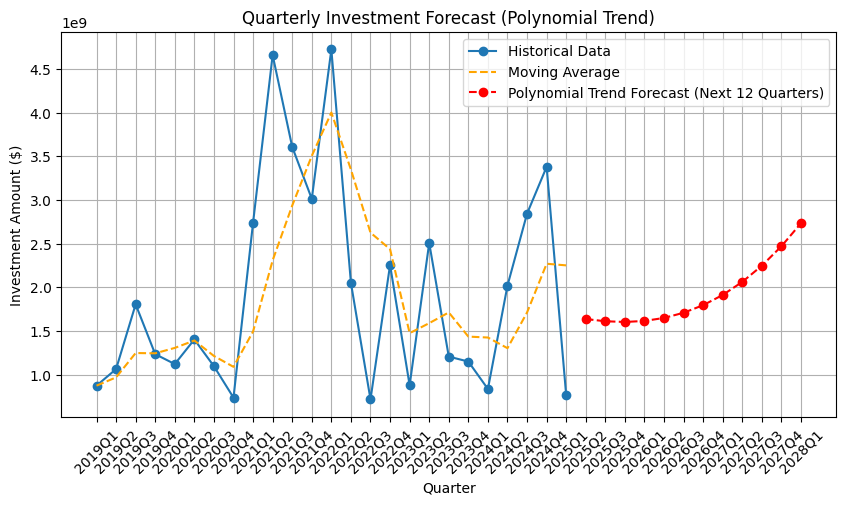

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount"])
df["year_quarter"] = df["date"].dt.to_period("Q")

quarterly_investment = df.groupby("year_quarter")["amount"].sum().reset_index()
quarterly_investment["Moving_Avg"] = quarterly_investment["amount"].rolling(window=4, min_periods=1).mean()
quarterly_investment["quarter_index"] = np.arange(len(quarterly_investment))

X = quarterly_investment[["quarter_index"]]
y = quarterly_investment["Moving_Avg"]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, y)

forecast_steps = 3
future_quarters = [str(quarterly_investment["year_quarter"].iloc[-1] + i) for i in range(1, forecast_steps + 1)]
future_index = np.arange(len(quarterly_investment), len(quarterly_investment) + forecast_steps).reshape(-1, 1)
future_poly = poly.transform(future_index)
forecast_values = model.predict(future_poly)

plt.figure(figsize=(10, 5))
plt.plot(quarterly_investment["year_quarter"].astype(str), quarterly_investment["amount"], label="Historical Data", marker="o", linestyle="-")
plt.plot(quarterly_investment["year_quarter"].astype(str), quarterly_investment["Moving_Avg"], label="Moving Average", linestyle="dashed", color="orange")
plt.plot(future_quarters, forecast_values, label="Polynomial Trend Forecast (Next 12 Quarters)", linestyle="dashed", marker="o", color="red")

plt.xlabel("Quarter")
plt.ylabel("Investment Amount ($)")
plt.title("Quarterly Investment Forecast (Polynomial Trend)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

✅ Best Polynomial Degree: 6


/Users/yanajakhwal/Desktop/Projects/cxc25/env3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


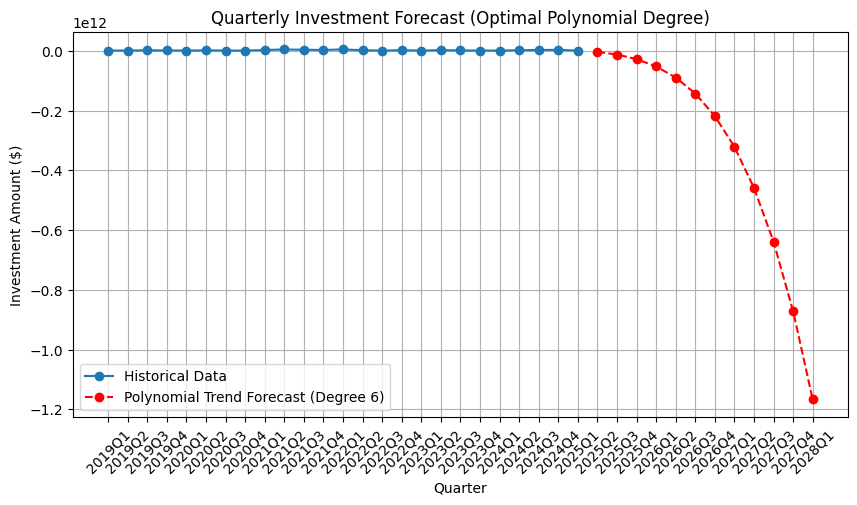

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ✅ Load and preprocess data
df = pd.read_csv("../data/deals_updated.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df = df.dropna(subset=["date", "amount"])
df["year_quarter"] = df["date"].dt.to_period("Q")

# ✅ Aggregate investment per quarter
quarterly_investment = df.groupby("year_quarter")["amount"].sum().reset_index()

# ✅ Convert quarter labels to numerical indexes
quarterly_investment["quarter_index"] = np.arange(len(quarterly_investment))

# ✅ Prepare Data
X = quarterly_investment[["quarter_index"]]
y = quarterly_investment["amount"]

# 🔥 **Find the Best Polynomial Degree using Cross-Validation**
best_degree = 1
lowest_mse = float("inf")
degrees = range(1, 7)  # Test polynomial degrees from 1 to 6

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    mse = mean_squared_error(y, y_pred)  # Compute error
    if mse < lowest_mse:
        lowest_mse = mse
        best_degree = degree  # Choose the degree with lowest error

print(f"✅ Best Polynomial Degree: {best_degree}")

# ✅ Fit Final Model with Best Degree
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

# ✅ Forecast Future Quarters
forecast_steps = 12
future_quarters = [str(quarterly_investment["year_quarter"].iloc[-1] + i) for i in range(1, forecast_steps + 1)]
future_index = np.arange(len(quarterly_investment), len(quarterly_investment) + forecast_steps).reshape(-1, 1)
future_poly = poly.transform(future_index)
forecast_values = model.predict(future_poly)

# ✅ Plot Results
plt.figure(figsize=(10, 5))
plt.plot(quarterly_investment["year_quarter"].astype(str), quarterly_investment["amount"], label="Historical Data", marker="o", linestyle="-")
plt.plot(future_quarters, forecast_values, label=f"Polynomial Trend Forecast (Degree {best_degree})", linestyle="dashed", marker="o", color="red")

plt.xlabel("Quarter")
plt.ylabel("Investment Amount ($)")
plt.title("Quarterly Investment Forecast (Optimal Polynomial Degree)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()